<a href="https://colab.research.google.com/github/isil-slck/instagram-likes-linear-regression/blob/main/ISIL_of_Instagram_likes_prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instagram likes prediction

In this challenge, it'll be used Linear Regression further by seeing if it can be predicted some metrics from social media!


## Data Exploration

a) Download the [dataset](https://drive.google.com/file/d/1O8ey3uytjqzRUQXTnmXkiqGBoa6lne1C/view?usp=sharing) and upload it to Google Colab. Load data in a `posts` dataframe. One row of this dataset represents an Instagram post.

In [17]:

import pandas as pd
import seaborn as sb

posts = pd.read_csv('posts.csv')


In [18]:

posts.head()

,id,followers,comments,posts,likes,ts
0,6e56f910,1804,2,851,73,2017-10-08 16:21:28
1,0bea9208,542,1,846,7,2017-07-07 11:58:18
2,88ec6c3f,669,2,1495,33,2018-03-19 17:22:29
3,006b0d03,757,9,144,166,2018-09-02 18:49:52
4,c8a0f2a6,539,4,453,71,2018-04-18 14:15:36


b) Column `id` designates the author. How many **unique** authors does the dataset have ?

In [19]:

posts['id'].nunique()
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260902 entries, 0 to 2260901
Data columns (total 6 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   id         object
 1   followers  int64 
 2   comments   int64 
 3   posts      int64 
 4   likes      int64 
 5   ts         object
dtypes: int64(4), object(2)
memory usage: 103.5+ MB


c) Sort `df_posts` by **ascending date**.

In [20]:

posts['ts'] = pd.to_datetime(posts['ts'])

df_posts = posts.sort_values(by = ['ts'],ascending=True)
df_posts.head()


,id,followers,comments,posts,likes,ts
651352,8fd5eb8f,560,1,1270,8,2015-01-01 00:00:03
1066195,e118b32e,711,0,646,23,2015-01-01 00:00:37
1275101,c2c2c06e,1703,0,811,18,2015-01-01 00:03:10
404586,d15ab509,357,1,794,10,2015-01-01 00:04:01
1180122,9473b9d1,207,0,217,2,2015-01-01 00:04:18


d) This dataset contains several posts for the same author.

By using the pandas function `drop_duplicates()` with parameter `keep=last`, **keep only the last post** made by each author.

This should leave you with a dataframe with as many rows as unique authors!

In [21]:

df_posts_new = df_posts.drop_duplicates(subset = 'id',keep= 'last')
df_posts_new.shape

(9298, 6)

e) Use Plotly to draw a scatter plot between likes and followers. Do you see any **correlation**?


<Axes: xlabel='likes', ylabel='followers'>

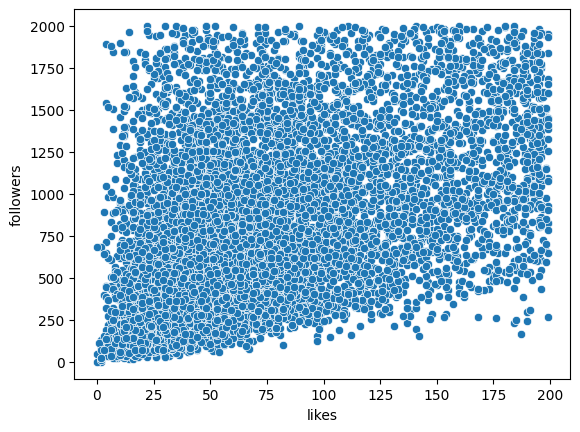

In [22]:

sb.scatterplot(df_posts_new, x="likes", y="followers")

This visual correlation that we see will serve as the intuition for the modelling that we are about to do!

## Modeling

### Preprocessing

a) Isolate the target and the feature!

The target is the number of likes!


In [23]:

X = df_posts_new[['followers']]
y = df_posts_new['likes']

b) Split X and y, **80% for training and 20% for testing** into appropriately named variables - X_train, X_test, y_train and y_test.


In [24]:

from sklearn.model_selection import train_test_split

X_train, X_test ,y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c) Need to normalize!

Let's use the standard scaler 👍

In [25]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#then we transform the train and tests sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

d) Train a Linear Regression model that predicts likes (our y) based on followers (our X)! Remember to only train it on our **scaled training set**, not on our test set!

In [26]:

from sklearn.linear_model import LinearRegression
reg =LinearRegression()
reg.fit(X_train_scaled, y_train)
reg

LinearRegression()

### Evaluation

e) What is the R2 score on the train data? What is the MSE (mean squared error)? What about the MAE (mean absolute error)?


In [27]:

from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

y_train_pred = reg.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)

print(f'mse train : {mse_train:.3f}')
print(f'mae train : {mae_train:.3f}')
print(f'r2 train : {r2_train:.3f}')


mse train : 1719.080
mae train : 32.346
r2 train : 0.255


R2 is close to 0, so the model doesn't look very good.
MSE is quite difficult to interpret, but MAE is much simpler. The model has an error of 32 likes on average.

f) It's time to evaluate the model on test data!

Use the model to predict likes for test data and store the predictions in 'pred_model_1'.

In [28]:

pred_model_1 = reg.predict(X_test_scaled)

g) What is R2 score value on test data? What is the MSE (mean squared error)?


In [29]:
mse_test = mean_squared_error(y_test, pred_model_1)
mae_test = mean_absolute_error(y_test,pred_model_1)
r2_test = r2_score(y_test,pred_model_1)

print(f'mse test : {mse_test:.3f}')
print(f'mae test : {mae_test:.3f}')
print(f'r2 test : {r2_test:.3f}')


mse test : 1868.944
mae test : 33.451
r2 test : 0.225


Results are similar, the model is not really good. It was expected because with such simple model, it is not possible to get very accurate results.

h) Try to add one feature to the model.


In [30]:
# load data

archive = pd.read_csv('posts.csv')

archive['ts'] = pd.to_datetime(archive['ts'])

# sort values by date
archive = archive.sort_values(by='ts', ascending=True)

# keep only most recent posts
most_recent_posts = archive.drop_duplicates('id', keep='last')

# keep from archive every posts except most recent
posts_wo_most_recent = archive[~archive.index.isin(most_recent_posts.index)]

# compute median of likes on previous posts
median_last_posts = posts_wo_most_recent.groupby('id', as_index=False)[['likes']].median()

# rename column likes by historical_likes
median_last_posts = median_last_posts.rename({'likes': 'historical_likes'}, axis=1)

# merge this colum to initial dataframe with inner join
df_posts_new = most_recent_posts.merge(median_last_posts, on="id")

i) Have a look at `df_posts_new` to understand what the previous code did!

In [31]:
df_posts_new

,id,followers,comments,posts,likes,ts,historical_likes
0,c43f3233,1532,2,76,177,2016-03-26 20:15:50,146.0
1,38cc9619,1395,10,152,192,2016-04-01 14:53:58,187.0
2,58ce1b8d,582,1,80,32,2016-06-23 12:28:21,17.5
3,0dd11d6c,1566,0,57,150,2016-07-24 19:29:49,168.0
4,688eb92e,1675,1,159,166,2016-08-24 21:15:57,149.0
...,...,...,...,...,...,...,...
9242,bd90c5ec,840,1,120,107,2019-03-10 23:53:48,52.0
9243,2e246173,582,2,12,27,2019-03-10 23:53:54,108.5
9244,b0817588,1751,0,704,23,2019-03-10 23:54:41,26.0
9245,4bdf6fc3,1250,2,303,42,2019-03-10 23:57:42,44.0


j) Let's start all over, but now X is **followers and historical likes**.

Split X and y!

In [32]:
X = df_posts_new[['followers','historical_likes']] #2D array
y = df_posts_new['likes'] # 1D array

k) Split into train and test split!

In [33]:
X_train, X_test ,y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

l) Scale!

In [34]:
scaler = StandardScaler()

#then we transform the train and tests sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

m) Time to train a new model!

Train a new linear regression with our new `X_train_scaled`!

In [35]:
reg =LinearRegression()
reg.fit(X_train_scaled, y_train)
reg

LinearRegression()

i) Calculate R2, MSE and MAE on the test data.

In [36]:
pred_model_2 = reg.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, pred_model_2)
mae_test = mean_absolute_error(y_test,pred_model_2)
r2_test = r2_score(y_test,pred_model_2)

print(f'mse test : {mse_test:.3f}')
print(f'mae test : {mae_test:.3f}')
print(f'r2 test : {r2_test:.3f}')

mse test : 1006.706
mae test : 23.405
r2 test : 0.557


This model is better, with an average error of around 23 likes.
R2 is much better than the previous model.